#  ACC and GYR - physical activity detection

## Joni Rajamaki and Usairim Isani



In [1]:
%xmode Minimal
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import tsfel
import random

# Machine learning packages - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier

Exception reporting mode: Minimal


In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data_path = "./Data"
train_data_path = f'{data_path}/Train'
test_data_path = f'{data_path}/Test'
extracted_features_path = "./Features"

In [4]:
train_dir = os.listdir(train_data_path)

In [5]:
test_df = pd.read_csv("./Data/Train/standing/sample_ID10_exp19_125.csv")
cfg_file = tsfel.get_features_by_domain(json_path="./features.json")



In [6]:
# cfg_file = tsfel.get_features_by_tag(tag="inertial")
tsfel.get_number_features(cfg_file)
extracted_features = tsfel.time_series_features_extractor(
    cfg_file, test_df, fs=50, window_size=250, verbose=0)
extracted_features.to_csv("./test.csv")
print(len(extracted_features.columns)/6)
extracted_features


172.0


,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF_0,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_10,0_FFT mean coefficient_100,...,5_Wavelet absolute mean_0,5_Wavelet absolute mean_1,5_Wavelet energy_0,5_Wavelet energy_1,5_Wavelet entropy,5_Wavelet standard deviation_0,5_Wavelet standard deviation_1,5_Wavelet variance_0,5_Wavelet variance_1,5_Zero crossing rate
0,257.983808,5.057764,257.983808,2.492016,0.004,0.64478,9.963536e-08,0.000004,0.000004,7.373815e-07,...,0.00001,0.000091,0.025914,0.068832,0.596355,0.025914,0.068832,0.000672,0.004738,29.0


In [7]:
extracted_features
tsfel.entropy(test_df)

1.1200822403426418

In [8]:
d = test_df.sample(1)

<AxesSubplot: >

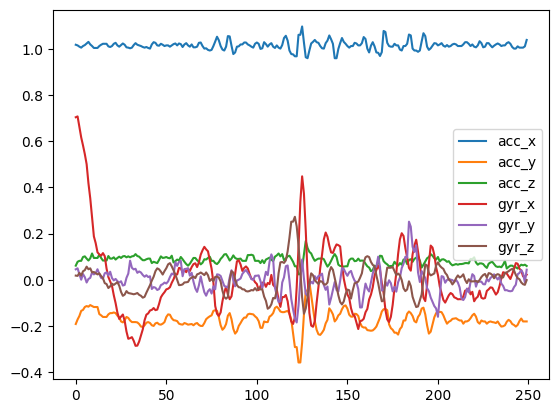

In [9]:
test_df.plot.line()

In [10]:
def read_data(data_path):
    folders = {}
    for folder in os.listdir(data_path):
        samples = {}
        for file in os.listdir(f'{data_path}/{folder}'):
            with open(f'{data_path}/{folder}/{file}') as f:
                sample_df = pd.read_csv(f)
                samples[file]=sample_df
        folders[folder] = samples
    return folders


{
    walking: {
        subject: TimeSeries
        ...
    }
}

In [11]:
train_data = read_data(train_data_path)
test_data = read_data(test_data_path)

In [12]:
cfg_file = tsfel.get_features_by_domain()
tsfel.get_number_features(cfg_file)

389

In [13]:
def extract_features(data, out):
    for label in data:
        for subject in data[label]:
            subject_df = data[label][subject]
            extracted_features = tsfel.time_series_features_extractor(cfg_file, subject_df, fs=50, window_size=250 , verbose=0)
            extracted_features.insert(0,"Label", label)
            extracted_features.insert(0,"Subject",subject)
            extracted_features.to_csv(f'{extracted_features_path}/{out}/{subject}.csv') 

- Feature Selection
  - Get a better feature subset
  - list of import features
  - list the feature used 
  - feature regarding activity
- Conclusion at the end

In [14]:
extract_features(train_data, "Train")
extract_features(test_data, "Test")

In [15]:
def data_to_csv(path, name):
    all_files = glob.glob(f'{extracted_features_path}/{path}/*.csv')
    extracted_features_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
    extracted_features_df.to_csv(f'{extracted_features_path}/{name}.csv')

In [16]:
data_to_csv("Train", "training")
data_to_csv("Test", "testing")

In [17]:
training_features = pd.read_csv(f'{extracted_features_path}/training.csv')
testing_features = pd.read_csv(f'{extracted_features_path}/testing.csv')

In [18]:
training_features.sample(10)

,Unnamed: 0.1,Unnamed: 0,Subject,Label,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,...,5_Wavelet variance_0,5_Wavelet variance_1,5_Wavelet variance_2,5_Wavelet variance_3,5_Wavelet variance_4,5_Wavelet variance_5,5_Wavelet variance_6,5_Wavelet variance_7,5_Wavelet variance_8,5_Zero crossing rate
81,81,0,sample_ID15_exp30_176.csv,walking_upstairs,263.978286,4.869861,263.978286,2.566653,50.0,200.0,...,0.015439,0.090847,0.176630,0.247919,0.308560,0.398041,0.550046,0.767174,1.032469,30.0
1151,1151,0,sample_ID7_exp13_83.csv,lying,0.112458,0.092556,0.112458,2.309525,50.0,200.0,...,0.000018,0.000033,0.000044,0.000045,0.000049,0.000055,0.000061,0.000066,0.000070,86.0
110,110,0,sample_ID11_exp23_137.csv,sitting,255.486586,5.033639,255.486586,2.488215,50.0,200.0,...,0.000303,0.000689,0.001273,0.001657,0.001590,0.001393,0.001262,0.001215,0.001218,55.0
692,692,0,sample_ID1_exp2_14.csv,walking,260.039123,4.942472,260.039123,2.499058,50.0,200.0,...,0.044133,0.190543,0.275105,0.360145,0.439882,0.460616,0.438934,0.411900,0.396132,39.0
206,206,0,sample_ID13_exp27_174.csv,standing,258.094214,5.060042,258.094214,2.489092,50.0,200.0,...,0.000251,0.002011,0.003648,0.003085,0.001890,0.001257,0.001030,0.000900,0.000777,44.0
442,442,0,sample_ID15_exp31_168.csv,walking_downstairs,292.084155,4.827625,292.084155,2.509253,50.0,200.0,...,0.061959,0.236748,0.411995,0.633815,0.903670,1.123395,1.182672,1.087143,0.927407,41.0
1013,1013,0,sample_ID14_exp28_161.csv,walking_upstairs,194.097537,4.209472,194.097537,2.353029,50.0,200.0,...,0.026048,0.214628,0.530973,0.873594,1.255387,1.732477,2.418331,3.416267,4.726503,14.0
577,577,0,sample_ID4_exp8_54.csv,standing,260.600112,5.084264,260.600112,2.493108,50.0,200.0,...,0.000242,0.000764,0.002024,0.004002,0.006118,0.008088,0.009937,0.011927,0.014301,14.0
669,669,0,sample_ID17_exp35_203.csv,walking_upstairs,244.497421,4.710042,244.497421,2.420257,50.0,200.0,...,0.014465,0.067619,0.117316,0.202381,0.340091,0.526160,0.751771,1.007714,1.287872,20.0
1108,1108,0,sample_ID20_exp41_229.csv,walking_downstairs,270.753276,4.909834,270.753276,2.555561,50.0,200.0,...,0.125181,0.752480,1.169771,1.535011,1.927631,2.341902,2.661329,2.731521,2.519899,34.0


In [19]:
testing_features.sample(10)

,Unnamed: 0.1,Unnamed: 0,Subject,Label,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,...,5_Wavelet variance_0,5_Wavelet variance_1,5_Wavelet variance_2,5_Wavelet variance_3,5_Wavelet variance_4,5_Wavelet variance_5,5_Wavelet variance_6,5_Wavelet variance_7,5_Wavelet variance_8,5_Zero crossing rate
750,750,0,sample_ID24_exp49_347.csv,sitting,259.495405,5.073681,259.495405,2.489924,50.000000,200.000000,...,0.000041,0.000075,0.000147,0.000236,0.000292,0.000328,0.000379,0.000462,0.000576,46.0
46,46,0,sample_ID29_exp58_398.csv,walking,284.811879,5.130834,284.811879,2.516983,50.000000,200.000000,...,0.031679,0.164146,0.398332,0.648863,0.720043,0.577180,0.386008,0.266006,0.221757,47.0
519,519,0,sample_ID27_exp55_399.csv,sitting,258.755025,5.065584,258.755025,2.496399,50.000000,200.000000,...,0.000618,0.003683,0.009451,0.017126,0.029848,0.049718,0.075521,0.103892,0.130754,15.0
497,497,0,sample_ID30_exp61_489.csv,standing,262.479806,5.100806,262.479806,2.490383,50.000000,200.000000,...,0.001835,0.006689,0.020777,0.046335,0.077941,0.104064,0.116984,0.117056,0.109706,16.0
230,230,0,sample_ID29_exp58_460.csv,standing,261.992636,5.097792,261.992636,2.489790,50.000000,200.000000,...,0.000082,0.000432,0.001357,0.002792,0.004588,0.006539,0.008369,0.009791,0.010627,37.0
260,260,0,sample_ID29_exp58_324.csv,walking_downstairs,296.168803,5.093306,296.168803,2.532040,50.000000,200.000000,...,0.046134,0.168119,0.309541,0.482751,0.654120,0.821625,0.929042,0.925476,0.820374,36.0
293,293,0,sample_ID23_exp46_316.csv,sitting,240.505450,4.884403,240.505450,2.492960,50.000000,200.000000,...,0.000055,0.000053,0.000045,0.000062,0.000088,0.000108,0.000123,0.000132,0.000140,83.0
63,63,0,sample_ID30_exp60_440.csv,sitting,170.570938,4.113361,170.570938,2.493961,0.831944,0.831944,...,0.000017,0.000017,0.000018,0.000024,0.000028,0.000026,0.000023,0.000019,0.000017,106.0
807,807,0,sample_ID26_exp52_287.csv,walking_downstairs,287.731165,5.040611,287.731165,2.455063,50.000000,200.000000,...,0.034922,0.229738,0.418797,0.546634,0.598988,0.575949,0.509490,0.432161,0.358738,45.0
446,446,0,sample_ID28_exp56_334.csv,walking_upstairs,241.816297,4.752167,241.816297,2.451866,50.000000,200.000000,...,0.015758,0.062336,0.102061,0.166651,0.264403,0.384336,0.533657,0.729357,0.979139,22.0


In [20]:
# Separate the labels to their own dataframe
testing_labels = testing_features["Label"]
training_labels = training_features["Label"]

# Drop labels from rest of data
testing_features_no_labels = testing_features.drop(["Label", "Subject", "Unnamed: 0.1", "Unnamed: 0"], axis=1)
training_features_no_labels = training_features.drop(["Label","Subject","Unnamed: 0","Unnamed: 0.1"], axis=1)

# Check data
testing_features_no_labels.head(10)
training_features_no_labels.head(10)

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,5_Wavelet variance_0,5_Wavelet variance_1,5_Wavelet variance_2,5_Wavelet variance_3,5_Wavelet variance_4,5_Wavelet variance_5,5_Wavelet variance_6,5_Wavelet variance_7,5_Wavelet variance_8,5_Zero crossing rate
0,258.546808,5.064347,258.546808,2.488045,50.0,200.0,1.012500,1.019445,0.004,0.008,...,0.000096,0.000322,0.000491,0.001015,0.001961,0.003295,0.004961,0.006840,0.008765,35.0
1,248.411002,4.845931,248.411002,2.516621,50.0,200.0,0.775000,1.236111,0.004,0.008,...,0.025688,0.121122,0.395748,0.716097,0.805651,0.652813,0.459236,0.363558,0.369806,27.0
2,308.463970,4.970222,308.463970,2.583284,50.0,200.0,0.572222,1.509722,0.004,0.008,...,0.051682,0.230250,0.429020,0.624145,0.828155,0.945226,0.907470,0.764030,0.604243,38.0
3,262.718817,4.963459,262.718817,2.503430,50.0,200.0,0.797222,1.206945,0.004,0.008,...,0.039753,0.120835,0.171568,0.285740,0.361080,0.359866,0.326080,0.302461,0.298562,43.0
4,175.813698,4.175834,175.813698,2.486844,50.0,200.0,0.834722,0.841667,0.004,0.008,...,0.000105,0.000285,0.000408,0.000628,0.000860,0.001013,0.001091,0.001117,0.001107,70.0
5,260.968683,5.087459,260.968683,2.487137,50.0,200.0,1.009722,1.033333,0.004,0.008,...,0.001112,0.006140,0.012684,0.018878,0.025162,0.030615,0.034739,0.038041,0.041300,41.0
6,279.114259,4.888556,279.114259,2.490672,50.0,200.0,0.648611,1.359722,0.004,0.008,...,0.028888,0.164820,0.327814,0.501150,0.654962,0.749854,0.750384,0.662547,0.533853,29.0
7,266.083682,4.967153,266.083682,2.514870,50.0,200.0,0.773611,1.162500,0.004,0.008,...,0.036333,0.195023,0.386463,0.601361,0.755011,0.797205,0.768983,0.711700,0.648024,38.0
8,0.114606,0.072583,0.114606,3.819868,50.0,200.0,0.002778,0.020833,0.004,0.008,...,0.000255,0.002010,0.003693,0.004204,0.004528,0.004711,0.004758,0.004714,0.004597,58.0
9,1.527849,0.384806,1.527849,2.440198,50.0,200.0,-0.087500,-0.065278,0.004,0.008,...,0.000024,0.000034,0.000052,0.000055,0.000045,0.000034,0.000032,0.000036,0.000045,85.0


In [21]:
# Standardize data (default value is 0)
scaler = StandardScaler()
training_features_scaled = scaler.fit_transform(training_features_no_labels)
testing_features_scaled = scaler.transform(testing_features_no_labels)

In [22]:
training_features.shape

(1170, 1564)

In [23]:
training_labels.shape

(1170,)

In [24]:
# Train KNN model
train_knn = KNeighborsClassifier(n_neighbors=3) #define the model
train_knn.fit(training_features_scaled, training_labels) #train/fit model and data
predictions_knn = train_knn.predict(testing_features_scaled) #predictions

print(metrics.confusion_matrix(testing_labels, predictions_knn)) #print confusion matrix with labels_train vs. the predictions
acc = metrics.accuracy_score(testing_labels, predictions_knn) #get accuracy score
print("accuracy:",acc) #print accuracy score

[[ 81   3   0   0   0   0]
 [  0 155  14   0   0   0]
 [  0  20 168   0   0   0]
 [  0   0   0 143   1   0]
 [  0   0   0   2 115   2]
 [  0   0   0   0   2 126]]
accuracy: 0.9471153846153846


Accuracy pair group
which parts was it better
Compare methods ML, affects of hyperparameter on results

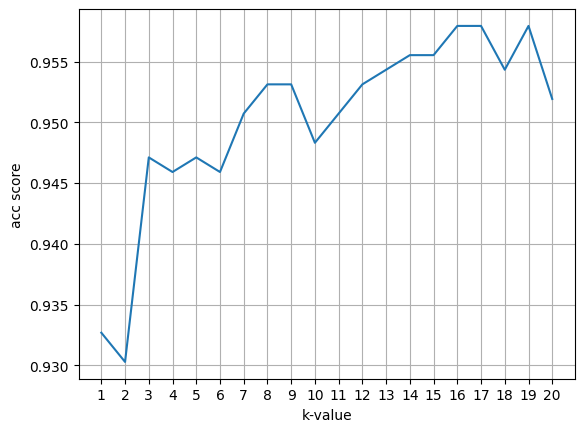

In [25]:
# Trying different k-values (0-20)
accuracies = []
for k in range(1,21):
    train_knn = KNeighborsClassifier(n_neighbors=k) #define the model
    train_knn.fit(training_features_scaled, training_labels) #train/fit model and data
    predictions_knn = train_knn.predict(testing_features_scaled) #predictions

    #print(metrics.confusion_matrix(testing_labels, predictions_knn)) #print confusion matrix with labels_train vs. the predictions
    acc = metrics.accuracy_score(testing_labels, predictions_knn) #get accuracy score
    #print("accuracy:",acc) #print accuracy score
    accuracies.append(acc)

plt.plot(range(1,21),accuracies,)
plt.ylabel('acc score')
plt.xlabel('k-value')
plt.xticks(range(1,21))
plt.grid()

In [26]:
# Train RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(training_features_scaled, training_labels)
prediction_ridge = ridge.predict(testing_features_scaled)
print(metrics.confusion_matrix(testing_labels, prediction_ridge)) #print confusion matrix with labels_train vs. the predictions
acc = metrics.accuracy_score(testing_labels, prediction_ridge) #get accuracy score
print("accuracy:",acc) #print accuracy score

[[ 81   3   0   0   0   0]
 [  0 167   2   0   0   0]
 [  0  10 178   0   0   0]
 [  0  18   4 122   0   0]
 [  0  18  17   0  81   3]
 [  0   7  12   0   0 109]]
accuracy: 0.8870192307692307


In [30]:
# AUROC and ROC Curves
#https://www.w3schools.com/python/python_ml_auc_roc.asp used this as an example.
def plot_roc_curve(true_y, predictions):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, predictions) #fpr as false positive rate ja tpr as true positive rate
    # roc_auc = metrics.auc(fpr, tpr) #area under curve
    # plt.plot(fpr,tpr) # plot false positive vs true positive line
    # plt.plot([0,1], [0,1], color='r', linestyle="--") # random guess line
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # print("AUROC =", roc_auc) #print auroc score
    
plot_roc_curve(testing_labels, predictions_knn) #call function with knn
plot_roc_curve(testing_labels, prediction_ridge) #call function with ridge

ValueError: multiclass format is not supported

# Discussion 
- Features 
  - Study more about the features we have 
  - Use a smaller subset
  - read more docs for tsfel
- Accuracy ? 
  - Over fitting
  - Just too many features makes accurate
- Evaluation of the model
  - auc-roc curve
  - F1Score
  - confidence score
- Hyper parameter tuning


plot activities
plot hyperparameters with models